# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;

# Proyecto integrador 2 | Sprint 12

## Descripcion del proyecto

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

## 1. Preparacion de los Datos

### Carga de librerias y recursos

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats as st
import numpy as np
import seaborn as sns

#Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Herramientas
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 1.1. Visualizacion de los Datos

In [2]:
#Se carga el Dataframe
train = pd.read_csv("gold_recovery_train.csv", sep=",")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [3]:
#Se carga el Dataframe
test = pd.read_csv("gold_recovery_test.csv", sep=",")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [4]:
#Se carga el Dataframe
full = pd.read_csv("gold_recovery_full.csv", sep=",")

print(full)
print()
print(full.info())

                      date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
22711  2018-08-18 06:59:59                     3.224920   
22712  2018-08-18 07:59:59                     3.195978   
22713  2018-08-18 08:59:59                     3.109998   
22714  2018-08-18 09:59:59                     3.367241   
22715  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759   
3                  

Vemos que el DataFrame original "Full" posee 86 caracteristicas, que son bastantes. Los otros DataFrames, naturalmente salen del DataFrame completo, pero con la particularidad de que el DataFrame "Train" contiene todas las caracteristicas del DataFrame original, pero solo tres cuartas partes del total de los datos. Y el DataFrame "Test" contiene solo algunas de las caracteristicas, donde podemos destacar: La entrada de la mezcla de minerales, adiciones de reactivos, asi como niveles de agua y aire de los flotadores. dando a entender que este DataFrame tiene el cometido de crear un modelo en el cual solo se tome la entrada de minerales y que segun los parametros de los consumibles de la maquinaria como lo son el aire, el agua y su reactivos se pueda predecir la extraccion de oro.

### 1.2. Comprobacion del calculo

In [5]:
#Extraemos unicamente las caracteristicas que son relevantes para el calculo
df = train.loc[:, ["rougher.output.concentrate_au", "rougher.input.feed_au", "rougher.output.tail_au", "rougher.output.recovery"]]

#Por practicidad, renombramos las columnas segun simbolo en la formula
df = df.rename(columns={"rougher.output.concentrate_au": "C", "rougher.input.feed_au": "F", "rougher.output.tail_au": "T", "rougher.output.recovery": "recovery"})
print(df)

               C         F         T   recovery
0      19.793808  6.486150  1.170244  87.107763
1      20.050975  6.478583  1.184827  86.843261
2      19.737170  6.362222  1.162562  86.842308
3      19.320810  6.118189  1.079755  87.226430
4      19.216101  5.663707  1.012642  86.688794
...          ...       ...       ...        ...
16855  18.603550  5.335862  0.748633  89.574376
16856  18.441436  4.838619  0.771582  87.724007
16857  15.111231  4.525061  0.685059  88.890579
16858  17.834772  4.362781  0.567130  89.858126
16859  17.804134  4.365491  0.586439  89.514960

[16860 rows x 4 columns]


In [6]:
#Eliminamos filas con valores nulos
df = df.dropna()

#Aplicamos la formula
df["calculated_recovery"] = ((df["C"] * (df["F"] - df["T"])) / (df["F"] * (df["C"] - df["T"]))) * 100
print(df)

               C         F         T   recovery  calculated_recovery
0      19.793808  6.486150  1.170244  87.107763            87.107763
1      20.050975  6.478583  1.184827  86.843261            86.843261
2      19.737170  6.362222  1.162562  86.842308            86.842308
3      19.320810  6.118189  1.079755  87.226430            87.226430
4      19.216101  5.663707  1.012642  86.688794            86.688794
...          ...       ...       ...        ...                  ...
16855  18.603550  5.335862  0.748633  89.574376            89.574376
16856  18.441436  4.838619  0.771582  87.724007            87.724007
16857  15.111231  4.525061  0.685059  88.890579            88.890579
16858  17.834772  4.362781  0.567130  89.858126            89.858126
16859  17.804134  4.365491  0.586439  89.514960            89.514960

[14287 rows x 5 columns]


In [7]:
#Calculamos el error medio absoluto o "MAE" para determinar la diferencia entre el oro extraido real y el calculado por la formula
print(mean_absolute_error(df["recovery"], df["calculated_recovery"]))

9.303415616264301e-15


La diferencia es inapreciable, podriamos decir que la cantidad de oro extraido es igual a la cantidad de oro calculado por la formula. 

Tambien nos dice de forma indirecta que "rougher.output.recovery" solo tiene en cuenta el oro, los demas minerales los desprecia.

### 1.3. Analisis de caracteristicas del conjunto de prueba

In [8]:
#imprimimos el DataFrame
print(test)
print()
print(test.info())

                     date  primary_cleaner.input.sulfate  \
0     2016-09-01 00:59:59                     210.800909   
1     2016-09-01 01:59:59                     215.392455   
2     2016-09-01 02:59:59                     215.259946   
3     2016-09-01 03:59:59                     215.336236   
4     2016-09-01 04:59:59                     199.099327   
...                   ...                            ...   
5851  2017-12-31 19:59:59                     173.957757   
5852  2017-12-31 20:59:59                     172.910270   
5853  2017-12-31 21:59:59                     171.135718   
5854  2017-12-31 22:59:59                     179.697158   
5855  2017-12-31 23:59:59                     181.556856   

      primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                            14.993118                         8.080000   
1                            14.987471                         8.080000   
2                            12.884934                

El DataFrame "Test" no contiene todas las caracteristicas del DataFrame completo "Full". Este solo tiene datos que indican la entrada de la mezcla de minerales, adiciones de reactivos, asi como niveles de agua y aire de los flotadores. dando a entender que este DataFrame tiene el cometido de crear un modelo en el cual solo se tome la entrada de minerales y que segun los parametros de los consumibles de la maquinaria como lo son el aire, el agua y su reactivos se pueda predecir la extraccion de oro.

### 1.4. Procesamiento de datos

In [9]:
#Eliminamos las filas con valores ausentes
train = train.dropna()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-null  float64


In [10]:
#buscamos duplicados explicitos
print(train.duplicated().sum())

0


In [11]:
#hacemos lo mismo para el DataFrame "Test"
test = test.dropna()
print(test.info())
print()
print("En el DataFrame Test hay", test.duplicated().sum(), "duplicados explicitos")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5383 non-null   object 
 1   primary_cleaner.input.sulfate               5383 non-null   float64
 2   primary_cleaner.input.depressant            5383 non-null   float64
 3   primary_cleaner.input.feed_size             5383 non-null   float64
 4   primary_cleaner.input.xanthate              5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 10  primary_clea



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo en la sección de preparación de datos. Aquí te dejo un resumen detallado de los aspectos bien logrados:

*  **Carga de librerías adecuada**: Has importado un conjunto completo y pertinente de librerías tanto para manipulación de datos como para visualización y modelado. Esto te permitirá tener flexibilidad y profundidad en el análisis posterior.
*  **Exploración inicial completa**: Has hecho una revisión minuciosa del contenido de los DataFrames `train`, `test` y `full`, usando `.info()` y mostrando la estructura general. Esto demuestra un buen hábito de exploración inicial.
*  **Verificación del cálculo de recuperación**: Excelente validación de la fórmula de recuperación, con aplicación directa sobre el DataFrame y cálculo del error MAE (prácticamente cero). Bien hecho.
*  **Claridad en las diferencias entre datasets**: Describiste correctamente la composición de los archivos y su propósito en el flujo de trabajo.
*  **Procesamiento responsable**: Eliminación de valores nulos y verificación de duplicados de forma apropiada. Has documentado bien cada paso.

¡Sigue con este nivel de detalle y claridad en el resto del proyecto! 🚀

</div>


## 2. Analisis de datos

### 2.1. Concentracion de metales

#### 2.1.1 Oro

In [12]:
#creamos un DataFrame especifico para el oro
au = full.loc[:, ["date",
                   "rougher.input.feed_au",
                   "rougher.output.tail_au",
                   "rougher.output.concentrate_au",
                   "primary_cleaner.output.tail_au",
                   "primary_cleaner.output.concentrate_au",
                   "secondary_cleaner.output.tail_au",
                   "final.output.tail_au",
                   "final.output.concentrate_au"]]
print(au)

                      date  rougher.input.feed_au  rougher.output.tail_au  \
0      2016-01-15 00:00:00               6.486150                1.170244   
1      2016-01-15 01:00:00               6.478583                1.184827   
2      2016-01-15 02:00:00               6.362222                1.162562   
3      2016-01-15 03:00:00               6.118189                1.079755   
4      2016-01-15 04:00:00               5.663707                1.012642   
...                    ...                    ...                     ...   
22711  2018-08-18 06:59:59               5.335862                0.748633   
22712  2018-08-18 07:59:59               4.838619                0.771582   
22713  2018-08-18 08:59:59               4.525061                0.685059   
22714  2018-08-18 09:59:59               4.362781                0.567130   
22715  2018-08-18 10:59:59               4.365491                0.586439   

       rougher.output.concentrate_au  primary_cleaner.output.tail_au  \
0  

In [13]:
#El DataFrame no se ve bien por los nombres de las columnas, vamos a renombrarlas con nombres mas cortos.
au = au.rename(columns={"date" : "fecha",
                        "rougher.input.feed_au" : "mezcla",
                        "rougher.output.tail_au" : "cola_1",
                        "rougher.output.concentrate_au" : "concentrado",
                        "primary_cleaner.output.tail_au" : "cola_2",
                        "primary_cleaner.output.concentrate_au" : "limpieza",
                        "secondary_cleaner.output.tail_au" : "cola_3",
                        "final.output.tail_au" : "colas",
                        "final.output.concentrate_au" : "concentrado_final"})
print(au)

                     fecha    mezcla    cola_1  concentrado    cola_2  \
0      2016-01-15 00:00:00  6.486150  1.170244    19.793808  2.106679   
1      2016-01-15 01:00:00  6.478583  1.184827    20.050975  2.353017   
2      2016-01-15 02:00:00  6.362222  1.162562    19.737170  2.416800   
3      2016-01-15 03:00:00  6.118189  1.079755    19.320810  2.262051   
4      2016-01-15 04:00:00  5.663707  1.012642    19.216101  2.277073   
...                    ...       ...       ...          ...       ...   
22711  2018-08-18 06:59:59  5.335862  0.748633    18.603550  2.314352   
22712  2018-08-18 07:59:59  4.838619  0.771582    18.441436  2.462890   
22713  2018-08-18 08:59:59  4.525061  0.685059    15.111231  2.612231   
22714  2018-08-18 09:59:59  4.362781  0.567130    17.834772  2.800648   
22715  2018-08-18 10:59:59  4.365491  0.586439    17.804134  2.708046   

        limpieza    cola_3     colas  concentrado_final  
0      34.174427  2.606185  2.143149          42.192020  
1      

In [14]:
print("Concentracion de Oro promedio en la entrada",round(au["mezcla"].mean(),2), "%")
print()
print("Concentracion de Oro promedio despues de la flotacion",round(au["concentrado"].mean(),2), "%")
print()
print("Concentracion de Oro promedio despues de la primer etapa de limpieza",round(au["limpieza"].mean(),2), "%")
print()
print("Concentracion de Oro promedio final",round(au["concentrado_final"].mean(),2), "%")

Concentracion de Oro promedio en la entrada 7.57 %

Concentracion de Oro promedio despues de la flotacion 17.88 %

Concentracion de Oro promedio despues de la primer etapa de limpieza 29.21 %

Concentracion de Oro promedio final 40.0 %


La concentracion de Oro va aumentando conforme se va realizando el proceso de flotacion y las etapas de limpieza. Quedando al final, en promedio una concentracion de un 40% de Oro en el material limpio.

#### 2.1.2 Plata

In [15]:
#creamos un DataFrame especifico para el oro
ag = full.loc[:, ["date",
                   "rougher.input.feed_ag",
                   "rougher.output.tail_ag",
                   "rougher.output.concentrate_ag",
                   "primary_cleaner.output.tail_ag",
                   "primary_cleaner.output.concentrate_ag",
                   "secondary_cleaner.output.tail_ag",
                   "final.output.tail_ag",
                   "final.output.concentrate_ag"]]
print(ag)

                      date  rougher.input.feed_ag  rougher.output.tail_ag  \
0      2016-01-15 00:00:00               6.100378                5.008018   
1      2016-01-15 01:00:00               6.161113                4.955378   
2      2016-01-15 02:00:00               6.116455                4.843460   
3      2016-01-15 03:00:00               6.043309                4.655288   
4      2016-01-15 04:00:00               6.060915                4.552800   
...                    ...                    ...                     ...   
22711  2018-08-18 06:59:59               6.091855                4.207261   
22712  2018-08-18 07:59:59               6.121323                4.177943   
22713  2018-08-18 08:59:59               5.970515                4.050010   
22714  2018-08-18 09:59:59               6.048130                3.902494   
22715  2018-08-18 10:59:59               6.158718                3.925473   

       rougher.output.concentrate_ag  primary_cleaner.output.tail_ag  \
0  

In [16]:
#El DataFrame no se ve bien por los nombres de las columnas, vamos a renombrarlas con nombres mas cortos.
ag = ag.rename(columns={"date" : "fecha",
                        "rougher.input.feed_ag" : "mezcla",
                        "rougher.output.tail_ag" : "cola_1",
                        "rougher.output.concentrate_ag" : "concentrado",
                        "primary_cleaner.output.tail_ag" : "cola_2",
                        "primary_cleaner.output.concentrate_ag" : "limpieza",
                        "secondary_cleaner.output.tail_ag" : "cola_3",
                        "final.output.tail_ag" : "colas",
                        "final.output.concentrate_ag" : "concentrado_final"})
print(ag)

                     fecha    mezcla    cola_1  concentrado     cola_2  \
0      2016-01-15 00:00:00  6.100378  5.008018    11.500771  14.936526   
1      2016-01-15 01:00:00  6.161113  4.955378    11.615865  16.250511   
2      2016-01-15 02:00:00  6.116455  4.843460    11.695753  16.491823   
3      2016-01-15 03:00:00  6.043309  4.655288    11.915047  16.024359   
4      2016-01-15 04:00:00  6.060915  4.552800    12.411054  16.480185   
...                    ...       ...       ...          ...        ...   
22711  2018-08-18 06:59:59  6.091855  4.207261    11.124896  22.854592   
22712  2018-08-18 07:59:59  6.121323  4.177943    11.425983  23.002490   
22713  2018-08-18 08:59:59  5.970515  4.050010     8.523497  22.298149   
22714  2018-08-18 09:59:59  6.048130  3.902494    11.658799  22.714656   
22715  2018-08-18 10:59:59  6.158718  3.925473    11.959486  22.735927   

       limpieza     cola_3      colas  concentrado_final  
0      8.547551  14.500184  10.411962           6.05

In [17]:
print("Concentracion de Plata promedio en la entrada",round(ag["mezcla"].mean(),2), "%")
print()
print("Concentracion de Plata promedio despues de la flotacion",round(ag["concentrado"].mean(),2), "%")
print()
print("Concentracion de Plata promedio despues de la primer etapa de limpieza",round(ag["limpieza"].mean(),2), "%")
print()
print("Concentracion de Plata promedio final",round(ag["concentrado_final"].mean(),2), "%")

Concentracion de Plata promedio en la entrada 8.07 %

Concentracion de Plata promedio despues de la flotacion 10.87 %

Concentracion de Plata promedio despues de la primer etapa de limpieza 7.69 %

Concentracion de Plata promedio final 4.78 %


La concentracion de Plata aumenta despues del proceso de flotacion para luego disminuir conforme pasan las limpiezas del material. Posiblemente porque las etapas de limpieza no son optimas para la Plata, caso contrario el del Oro. Quedando al final, en promedio una concentracion de apenas un 4.78% de Plata en el material limpio.

#### 2.1.3 Plomo

In [18]:
#creamos un DataFrame especifico para el oro
pb = full.loc[:, ["date",
                   "rougher.input.feed_pb",
                   "rougher.output.tail_pb",
                   "rougher.output.concentrate_pb",
                   "primary_cleaner.output.tail_pb",
                   "primary_cleaner.output.concentrate_pb",
                   "secondary_cleaner.output.tail_pb",
                   "final.output.tail_pb",
                   "final.output.concentrate_pb"]]
print(pb)

                      date  rougher.input.feed_pb  rougher.output.tail_pb  \
0      2016-01-15 00:00:00               2.284912                0.508728   
1      2016-01-15 01:00:00               2.266033                0.536689   
2      2016-01-15 02:00:00               2.159622                0.546416   
3      2016-01-15 03:00:00               2.037807                0.542525   
4      2016-01-15 04:00:00               1.786875                0.515438   
...                    ...                    ...                     ...   
22711  2018-08-18 06:59:59               4.617558                0.612935   
22712  2018-08-18 07:59:59               4.144989                0.650557   
22713  2018-08-18 08:59:59               4.020002                0.636095   
22714  2018-08-18 09:59:59               3.902537                0.625609   
22715  2018-08-18 10:59:59               3.875727                0.638677   

       rougher.output.concentrate_pb  primary_cleaner.output.tail_pb  \
0  

In [19]:
#El DataFrame no se ve bien por los nombres de las columnas, vamos a renombrarlas con nombres mas cortos.
pb = pb.rename(columns={"date" : "fecha",
                        "rougher.input.feed_pb" : "mezcla",
                        "rougher.output.tail_pb" : "cola_1",
                        "rougher.output.concentrate_pb" : "concentrado",
                        "primary_cleaner.output.tail_pb" : "cola_2",
                        "primary_cleaner.output.concentrate_pb" : "limpieza",
                        "secondary_cleaner.output.tail_pb" : "cola_3",
                        "final.output.tail_pb" : "colas",
                        "final.output.concentrate_pb" : "concentrado_final"})
print(pb)

                     fecha    mezcla    cola_1  concentrado    cola_2  \
0      2016-01-15 00:00:00  2.284912  0.508728     7.101074  2.534912   
1      2016-01-15 01:00:00  2.266033  0.536689     7.278807  3.049646   
2      2016-01-15 02:00:00  2.159622  0.546416     7.216833  3.124664   
3      2016-01-15 03:00:00  2.037807  0.542525     7.175616  2.960362   
4      2016-01-15 04:00:00  1.786875  0.515438     7.240205  3.112100   
...                    ...       ...       ...          ...       ...   
22711  2018-08-18 06:59:59  4.617558  0.612935    10.984003  6.531541   
22712  2018-08-18 07:59:59  4.144989  0.650557    10.888213  6.629725   
22713  2018-08-18 08:59:59  4.020002  0.636095     8.955135  6.278250   
22714  2018-08-18 09:59:59  3.902537  0.625609    10.655377  6.253145   
22715  2018-08-18 10:59:59  3.875727  0.638677    10.702148  6.084287   

        limpieza    cola_3     colas  concentrado_final  
0      10.389648  4.694824  0.895447           9.889648  
1      

In [20]:
print("Concentracion de Plomo promedio en la entrada",round(pb["mezcla"].mean(),2), "%")
print()
print("Concentracion de Plomo promedio despues de la flotacion",round(pb["concentrado"].mean(),2), "%")
print()
print("Concentracion de Plomo promedio despues de la primer etapa de limpieza",round(pb["limpieza"].mean(),2), "%")
print()
print("Concentracion de Plomo promedio final",round(pb["concentrado_final"].mean(),2), "%")

Concentracion de Plomo promedio en la entrada 3.31 %

Concentracion de Plomo promedio despues de la flotacion 6.9 %

Concentracion de Plomo promedio despues de la primer etapa de limpieza 8.92 %

Concentracion de Plomo promedio final 9.1 %


La concentracion de Plomo va aumentando poco a poco conforme se va realizando el proceso de flotacion y las etapas de limpieza. Quedando al final, en promedio una concentracion de un 9.1% de Plomo en el material limpio.

Viendo como cambia la concentracion de metales, podemos asumir que el proceso esta enfocado en la recuperacion de Oro y que la Plata y el Plomo son mas bien metales no prioritarios.

Claro que la Plata sigue siendo un metal precioso, pero hay que ponerlo en perspectiva, Los siguientes son los precios actuales de los metales por gramo en dolares:

* 1g Oro = 126.18 dlls
* 1g Plata = 1.37 dlls
* 1g Plomo = 0.03 dlls

Entonces, un gramo de Oro vale 92 veces mas que el gramo de Plata, y el gramo de plata vale 45 veces mas que el de Plomo.

Siendo asi, no es raro que el proceso de recuperacion se centre en el Oro. 

### 2.2. Distribucion del Tamaño de las Particulas de Alimentacion

Antes de empezar a entrenar el modelo debemos asegurarnos que las medias de ambas poblaciones ("Train" y "Test") son iguales.
Para esto vamos a hacer lo siguiente:

1. Igualar el numero de observaciones de ambos DataFrames.
2. Comprobar la igualdad de las medias de las columnas "rougher.input.feed_au".

In [21]:
#Tomamos una muestra de "Train" con un numero de 5383 observaciones que equivalen a las mismas de "Test".
train_sample = train.sample(n=5383, random_state = 100)

#imprimimos el resultado para verificarlo
print(train_sample)

                      date  final.output.concentrate_ag  \
4983   2016-08-09 14:59:59                     6.493716   
5132   2016-08-15 19:59:59                     5.326159   
2714   2016-05-07 01:59:59                     6.023659   
10687  2017-08-04 06:59:59                     3.763910   
334    2016-01-28 22:00:00                     6.610941   
...                    ...                          ...   
6352   2017-02-04 15:59:59                     7.561775   
2231   2016-04-16 23:00:00                     3.610447   
14894  2018-05-28 13:59:59                     5.266039   
1113   2016-03-01 09:00:00                     3.836799   
4760   2016-07-31 07:59:59                     5.743269   

       final.output.concentrate_pb  final.output.concentrate_sol  \
4983                     10.664227                      9.832010   
5132                      8.599491                     10.569300   
2714                     12.097037                      8.642495   
10687              

In [22]:
#Calculamos la media
print("Media:", train_sample["rougher.input.feed_au"].mean())

#Calculamos el intervalo de confianza del 95% de la media
interval = st.t.interval(0.95, len(train_sample)-1, train_sample["rougher.input.feed_au"].mean(), train_sample["rougher.input.feed_au"].sem())
print()
print("Intervalo de confianza del 95%:", interval)


Media: 8.114333843514702

Intervalo de confianza del 95%: (8.06609076047971, 8.162576926549693)


Efectivamente la media calculada de la muestra se encuentra dentro del intervalo de confianza, por lo tanto la muestra obtenida de "Test" es representativa de toda la poblacion.

Ahora si, podemos comparar ambas medias poblacionales. 

In [23]:
#Vamos a hacer un t-test simple donde la hipotesis nula es que no existe diferencia entre las medias, la hipotesis alternativa por consiguiente es que son diferentes.

#Vamos a dejar un nivel de significancia tipico del 5%
alpha = 0.05

results = st.ttest_ind(train_sample["rougher.input.feed_au"], test["rougher.input.feed_au"], equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 2.3326924790070125e-244
Rechazamos la hipótesis nula


Rechazamos la hipotesis nula, por lo tanto las medias poblacionales son diferentes. 

Vamos a comprobar la media de de "Test" para tratar de averiguar que esta pasando.

In [24]:
#a modo de comprobacion vamos a ver cuanto en la media de "Test"
print("Media:", test["rougher.input.feed_au"].mean())

Media: 9.2929271848063


En efecto la media del DataFrame "Test" esta considerablemente por encima del intervalo de confianza de la muestra del DataFrame "Train".

En otras palabras, la diferencia entre el limite inferior y superior del intervalo de confianza es de 0.096, y la media de "Test" supera al limite superior por 1.13 que es casi 12 veces la diferencia entre los limites del intervalo de confianza. Por lo que no es extraño que el valor de "p" sea de 2.33e-244, indicando que es imposible que la media de "Test" sea parecida a la de "Train" por mas experimentos que se hagan con los datos.

Entonces, con esto comprobamos el resultado de nuestro t-test.

Para el ejercicio esto significa que el DataFrame "Test" no nos sirve para comprobar la efectividad del modelo si este es entrenado con el DataFrame "Train".

Sin embargo, podemos utilizar la validacion cruzada para entrenar y probar el modelo usando solo "Train". Pero lo mejor es usar el DataFrame completo o "Full".

#### 2.3. Concentraciones Totales de Sustancia

Es importante verificar los valores que tenemos en el DataFrame y corroborar si tenemos datos sesgados o atipicos.

Lo mas facil es verlo a traves de un diagrama de caja.

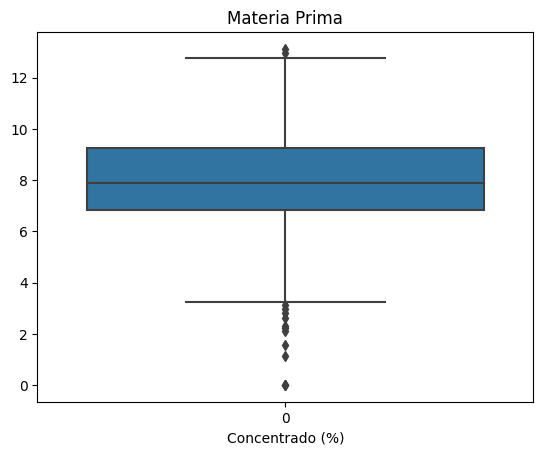

In [25]:
#Diagrama de caja
sns.boxplot(data=train_sample["rougher.input.feed_au"], width=0.8)

plt.title("Materia Prima")
plt.xlabel("Concentrado (%)")
plt.show()

In [26]:
#se imprimen los ultimos 15 valores acomodados de mayor a menos
print(train_sample["rougher.input.feed_au"].sort_values(ascending=False).tail(15))

564      3.375458
11143    3.336221
5386     3.252483
15659    3.131629
13964    2.981891
10641    2.798173
14225    2.641254
16670    2.317246
16673    2.234767
13644    2.121669
13034    1.582417
1404     1.131434
13036    0.010000
13038    0.010000
13035    0.010000
Name: rougher.input.feed_au, dtype: float64


In [27]:
#Calculamos media y median
print("Media:", round(train_sample["rougher.input.feed_au"].mean(),2))
print()
print("Mediana:", round(train_sample["rougher.input.feed_au"].median(),2))
print()

#Calculamos la diferencia entre media y mediana
print("Diferencia:", round(abs((train_sample["rougher.input.feed_au"].mean() / train_sample["rougher.input.feed_au"].median()) - 1) * 100, 2), "%")

Media: 8.11

Mediana: 7.88

Diferencia: 2.97 %


En la primer etapa de materia prima hay valores atipicos principalmente en la parte inferior del grafico. 
Imprimiendo los valores mas bajos solo destacan tres observaciones que tienen el mismo valor 0.010000. Que tengan exactamente el mismo valor podria significar que se trata de un error.
Tambien es destacable que la diferencia entre la media y la mediana es del 5%, lo cual no es mucho. 


Entonces, podemos asumir que si bien hay un sesgo en los datos este es minimo ya que no hay mucha diferencia entre el valor de la media y de la mediana.

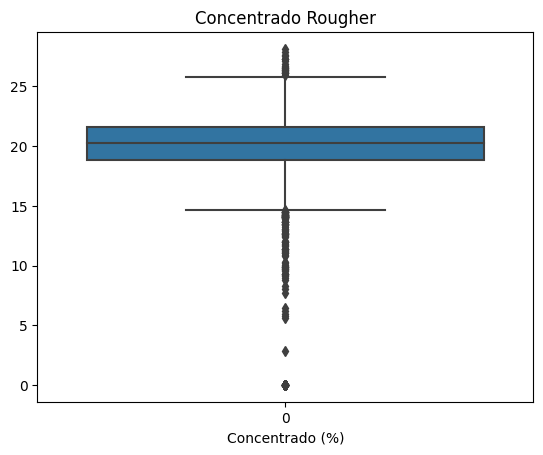

In [28]:
#Diagrama de caja
sns.boxplot(data=train_sample["rougher.output.concentrate_au"], width=0.8)

plt.title("Concentrado Rougher")
plt.xlabel("Concentrado (%)")
plt.show()

In [29]:
#se imprimen los ultimos 15 valores acomodados de mayor a menos
print(train_sample["rougher.output.concentrate_au"].sort_values(ascending=False).tail(15))

9266     0.0
9220     0.0
9271     0.0
9245     0.0
9278     0.0
7788     0.0
7791     0.0
9330     0.0
9244     0.0
12275    0.0
9273     0.0
9344     0.0
12265    0.0
9299     0.0
9239     0.0
Name: rougher.output.concentrate_au, dtype: float64


In [30]:
#Calculamos media y median
print("Media:", round(train_sample["rougher.output.concentrate_au"].mean(),2))
print()
print("Mediana:", round(train_sample["rougher.output.concentrate_au"].median(),2))
print()

#Calculamos la diferencia entre media y mediana
print("Diferencia:", round(abs((train_sample["rougher.output.concentrate_au"].mean() / train_sample["rougher.output.concentrate_au"].median()) - 1) * 100, 2), "%")

Media: 19.8

Mediana: 20.26

Diferencia: 2.26 %


En etapa de flotacion hay valores atipicos principalmente en la parte inferior del grafico. 
Imprimiendo los valores mas bajos es destacable el hecho de que hay valores en 0, lo cual es raro. Seguramente se trate de un error.
Tambien es destacable que la diferencia entre la media y la mediana es de apenas 2.26%. 


Hay un sesgo minimo en los datos ya que hay muy poca diferencia entre el valor de la media y de la mediana.

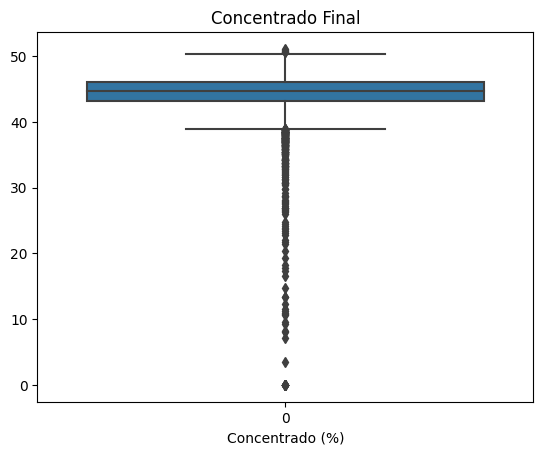

In [31]:
#Diagrama de caja
sns.boxplot(data=train_sample["final.output.concentrate_au"], width=0.8)

plt.title("Concentrado Final")
plt.xlabel("Concentrado (%)")
plt.show()

In [32]:
#se imprimen los ultimos 15 valores acomodados de mayor a menos
print(train_sample["final.output.concentrate_au"].sort_values(ascending=False).tail(15))

10474    7.198318
1404     3.505267
6820     0.000000
5136     0.000000
6131     0.000000
5944     0.000000
7587     0.000000
8226     0.000000
8225     0.000000
6130     0.000000
1357     0.000000
5943     0.000000
10469    0.000000
2592     0.000000
2810     0.000000
Name: final.output.concentrate_au, dtype: float64


In [33]:
#Calculamos media y median
print("Media:", round(train_sample["final.output.concentrate_au"].mean(),2))
print()
print("Mediana:", round(train_sample["final.output.concentrate_au"].median(),2))
print()

#Calculamos la diferencia entre media y mediana
print("Diferencia:", round(abs((train_sample["final.output.concentrate_au"].mean() / train_sample["final.output.concentrate_au"].median()) - 1) * 100, 2), "%")

Media: 44.11

Mediana: 44.78

Diferencia: 1.49 %


En la ultima etapa tambien hay valores atipicos principalmente en la parte inferior del grafico. 
Imprimiendo los valores mas bajos es destacable el hecho de que hay valores en 0, lo cual es raro. Seguramente se trate de un error.
Tambien es destacable que la diferencia entre la media y la mediana es de apenas 1.49%. 


Hay un sesgo minimo en los datos ya que hay muy poca diferencia entre el valor de la media y de la mediana.

Entonces, si bien hay un sesgo en los datos este es minimo y en cuanto a los datos que aparecen en 0, estos se podrian eliminar sin mayor problema.

## 3.Construccion del Modelo

### 3.1. Calculo de sMAPE

In [34]:
def smape(target, predictions):
    error = 0
    for i in range(target.shape[0]):
        error += abs(target[i] - predictions[i]) / ((abs(target[i]) + abs(predictions[i])) / 2)
    return error / target.shape[0] * 100

### 3.2. Entrenamiento de Modelos

Primeramente tenemos que identificar por la nomenclatura de las caracteristicas cuales son las variables independientes y cuales las dependientes y asi evitar la fuga de objetivos.

Principalmente, nuestras caracteristicas objetivo son;
1. rougher.output.recovery
2. final.output.recovery

Pero "final.output.recovery" depende de "rougher.output.recovery" como caracteristica para poder hacer estimaciones.

Entonces, creo que lo mejor es hacer diferentes modelos que vayan estimando diferentes objetivos y al final con estas estimaciones entrenar otro modelo que nos de en resultado de la caracteristica objetivo final, que es final.output.recovery.

Analizando el DataFrame "Full" podemos distinguir 5 bloques de datos, donde 4 de ellos hacen referencia a partes del proceso de limpieza y separacion de los minerales.
Los bloques como los llamaremos quedarian algo asi segun su orden en el DataFrame;

1. date - Es simplemente la fecha
2. final - Son los minerales y solidos resultantes de los procesos de flotacion y limpieza, y el agregado de las colas Rougher.
3. primary_cleaner - Hace referencia al primer proceso de limpieza.
4. rougher - Hace referencia al proceso de flotacion.
5. secondary_cleaner - Hace referencia al segundo proceso de limpieza.

Esto lo tendremos en mente a la hora de asignar las caracteristicas para evitar la fuga de objetivos.

In [35]:
#primero eliminamos los valores nulos
full = full.dropna().reset_index()

In [36]:
#ahora creamos un conjunto de prueba a partir del DataFrame completo teniendo una proporcion de 3:1.
full_train, full_test = train_test_split(full, test_size=0.20, random_state=1)

print("Datos para el entrenamiento:", full_train["rougher.input.feed_au"].count())
print()
print("Datos para prueba:", full_test["rougher.input.feed_au"].count())

Datos para el entrenamiento: 12875

Datos para prueba: 3219


Usaremos los datos de la siguiente manera:

* El conjunto de datos de entrenameinto se usaran para entrenar y validar el modelo mediante la tecnica de validacion cruzada.
* El conjunto de datos de prueba se usara para comprobar el modelo final.

#### 3.2.1. Modelo #1 | Caracteristica objetivo: "rougher.output.recovery"

In [37]:
#extraemos los datos del bloque "rougher" para hacer la prediccion de "rougher.output.recovery"
df_rougher = full_train.loc[:, "rougher.calculation.sulfate_to_au_concentrate" : "rougher.state.floatbank10_f_level"].reset_index(drop=True)

print(df_rougher.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875 entries, 0 to 12874
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.calculation.sulfate_to_au_concentrate       12875 non-null  float64
 1   rougher.calculation.floatbank10_sulfate_to_au_feed  12875 non-null  float64
 2   rougher.calculation.floatbank11_sulfate_to_au_feed  12875 non-null  float64
 3   rougher.calculation.au_pb_ratio                     12875 non-null  float64
 4   rougher.input.feed_ag                               12875 non-null  float64
 5   rougher.input.feed_pb                               12875 non-null  float64
 6   rougher.input.feed_rate                             12875 non-null  float64
 7   rougher.input.feed_size                             12875 non-null  float64
 8   rougher.input.feed_sol                              12875 non-null  float64


In [38]:
#Creamos dos DataFrames, uno con las caracteristicas independientes y otro con la caracteristica objetivo.
features_rougher = df_rougher.loc[:,["rougher.input.feed_ag",
                                       "rougher.input.feed_pb",
                                       "rougher.input.feed_rate",
                                       "rougher.input.feed_size",
                                       "rougher.input.feed_sol",
                                       "rougher.input.feed_au",
                                       "rougher.input.floatbank10_sulfate",
                                       "rougher.input.floatbank10_xanthate",
                                       "rougher.input.floatbank11_sulfate",
                                       "rougher.input.floatbank11_xanthate",
                                       "rougher.state.floatbank10_a_air",
                                       "rougher.state.floatbank10_a_level",
                                       "rougher.state.floatbank10_b_air",
                                       "rougher.state.floatbank10_b_level",
                                       "rougher.state.floatbank10_c_air",
                                       "rougher.state.floatbank10_c_level",
                                       "rougher.state.floatbank10_d_air",
                                       "rougher.state.floatbank10_d_level",
                                       "rougher.state.floatbank10_e_air",
                                       "rougher.state.floatbank10_e_level",
                                       "rougher.state.floatbank10_f_air",
                                       "rougher.state.floatbank10_f_level",
                                      ]]

target_rougher = df_rougher["rougher.output.recovery"]

#Comprobamos que se haya hecho el cambio

print(features_rougher)
print()
print(target_rougher)

       rougher.input.feed_ag  rougher.input.feed_pb  rougher.input.feed_rate  \
0                  10.461183               3.511812               479.906746   
1                   7.491453               3.273276               300.211953   
2                   6.786690               2.899521               449.432198   
3                   8.348077               4.710890               640.855278   
4                   9.929511               3.274426               411.817440   
...                      ...                    ...                      ...   
12870               8.418566               3.007857               499.420515   
12871               8.856648               3.332893               299.736432   
12872               8.275474               4.481551               638.953116   
12873               9.543249               3.641322               630.743174   
12874              10.720357               2.871974               663.469131   

       rougher.input.feed_size  rougher

In [39]:
#Creamos una variable y listas vacias para guardar los resultados del modelo
mse_values = []
r2_values = []
mean_mse = 0
rougher_predictions = []

#Se determina el tamaño de cada fold, a peticion del ejercicio en una proporcion de 80:20. Esto debido a que 12875 (el largo del DataFrame) solo es divisible entre 5. 
sample_size = int(len(df_rougher)/5)

#Se crea un bucle para crear los conjuntos de validacion iterando (i) en un rango que inicia en 0 y tiene como parada el largo del DataFrame, haciendo pasos del tamaño de "sample_size" por lo que el bucle se ejecutara 4 veces. 
for i in range(0, len(df_rougher), sample_size):
    #Se crea una lista de indices (conjunto de validacion) empezando en el inicio del fold "i" y terminando en el mismo inicio del fold "i" mas el tamaño de sample_size. Dando un fold de 25000 filas. 
    valid_indexes = list(range(i, i + sample_size))
    #Se crea una lista de indices (conjunto de prueba) tomando todos los folds antes de "i" mas todos los folds despues de "i". Es decir, se toman todos los folds menos el actual que viene a ser "i".
    train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_rougher)))
    
	#Del DataFrame "features" se aisla una parte, tomando las ubicaciones de las filas que aparecen en la lista de indices "train_index" mediante .iloc.
    features_train = features_rougher.iloc[train_indexes]
    #Del DataFrame "features" se aisla una parte, tomando las ubicaciones de las filas que aparecen en la lista de indices "valid_index" mediante .iloc.
    features_valid = features_rougher.iloc[valid_indexes]

    #Lo mismo que lo anterior, pero con las etiquetas.
    target_train = target_rougher.iloc[train_indexes]
    target_valid = target_rougher.iloc[valid_indexes]

    #Se crea el modelo y se entrena con los conjuntos de entrenamiento.
    model_rougher = LinearRegression()
    model_rougher = model_rougher.fit(features_train, target_train)

    #Predicciones con el conjunto de validacion
    predicted_valid = model_rougher.predict(features_valid)
    rougher_predictions.append(predicted_valid)
    
    #R2
    r2 = r2_score(target_valid, predicted_valid)
    r2_values.append(r2)
    
    #Calculo del RMSE
    mse = mean_squared_error(target_valid, predicted_valid)
    mse_values.append(mse)

    #prueba de congruencia RMSE medio
    mean_predicted_valid = pd.Series(target_train.mean(), index=target_valid.index)
    mean_mse = mean_squared_error(target_valid, mean_predicted_valid)

#Se promedian los puntajes del modelo.
final_r2 = sum(r2_values) / len(r2_values)
print("R2 =", final_r2)

final_mse = sum(mse_values) / len(mse_values)
print("MSE =", final_mse)
print("RMSE =", final_mse ** 0.5)

print("RMSE Medio =", mean_mse ** 0.5)

R2 = 0.17181099190227214
MSE = 146.9303553172258
RMSE = 12.1214832144101
RMSE Medio = 12.861220093042554


El resultado de R2 nos indica que el modelo de Machine Learning comprende mas o menos bien la varianza de las variables independientes con la variable dependiente. Por lo tanto el incremento o decremento de las caracteristicas no necesariamente se relacionan de forma evidente con un aumento o disminucion de la caracteristica objetivo.

En cuanto al RMSE tenemos que en promedio el modelo tiene una desviacion del valor predicho con respecto al valor real de 12.12 (concentrado en %). Al hacer la prueba de congruencia esta desviacion aumenta a 12.86 (concentrado en %). Por lo que es mejor hacer un pronostico con el modelo que hacerlo en base a la media.

In [40]:
#juntamos los 5 arrays de "rougher_predictions" en uno, ya que se separaron al hacer la validacion cruzada que divide el DataFrame en folds.
rougher_predictions_array = np.concatenate(rougher_predictions)
print(rougher_predictions_array)

[82.11529768 76.56716068 81.85791138 ... 85.4674821  87.87979042
 84.55108079]


In [41]:
#Ahora mandamos a llamar la funcion "smape" la cual esta desarrollada en 3.1.
print(smape(target_rougher, rougher_predictions_array))

8.801258827797454


El error porcentual absoluto medio simetrico o SMAPE representa la desviacion porcentual absoluta entre los valores reales y predichos. Y sabiendo que un 0% representa que no existe diferencia entre los datos reales y los predichos y que un 100% significa que no hay relacion entre estos, un 8.8% es un resultado muy bueno. 

Sin embargo, aun falta predecir "final.output.recovery" la cual, por ser la salida final del proceso, es la caracteristica objetivo mas importante.

#### 3.2.2. Modelo #2 | Caracteristica objetivo: "final.output.recovery"

In [42]:
print(full_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12875 entries, 6066 to 13349
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               12875 non-null  int64  
 1   date                                                12875 non-null  object 
 2   final.output.concentrate_ag                         12875 non-null  float64
 3   final.output.concentrate_pb                         12875 non-null  float64
 4   final.output.concentrate_sol                        12875 non-null  float64
 5   final.output.concentrate_au                         12875 non-null  float64
 6   final.output.recovery                               12875 non-null  float64
 7   final.output.tail_ag                                12875 non-null  float64
 8   final.output.tail_pb                                12875 non-null  float

In [43]:
#quitamos las caracteristicas que no vamos a usar para el modelo
df_final_output = full_train.loc[:, "final.output.recovery" : "secondary_cleaner.state.floatbank6_a_level"]
df_final_output = df_final_output.drop(["rougher.calculation.sulfate_to_au_concentrate",
                                             "rougher.calculation.floatbank10_sulfate_to_au_feed",
                                             "rougher.calculation.floatbank11_sulfate_to_au_feed",
                                             "rougher.calculation.au_pb_ratio",
                                             "rougher.input.feed_ag",
                                             "rougher.input.feed_pb",
                                             "rougher.input.feed_rate",
                                             "rougher.input.feed_size",
                                             "rougher.input.feed_sol",
                                             "rougher.input.feed_au",
                                             "rougher.input.floatbank10_sulfate",
                                             "rougher.input.floatbank10_xanthate",
                                             "rougher.input.floatbank11_sulfate",
                                             "rougher.input.floatbank11_xanthate",
                                             "rougher.output.concentrate_ag",
                                             "rougher.output.concentrate_pb",
                                             "rougher.output.concentrate_sol",
                                             "rougher.output.concentrate_au",
                                             "rougher.output.recovery",
                                             "rougher.output.tail_ag",
                                             "final.output.tail_ag",
                                             "final.output.tail_pb",
                                             "final.output.tail_sol",
                                             "final.output.tail_au",
                                             "rougher.output.tail_pb",
                                             "rougher.output.tail_sol",
                                             "rougher.output.tail_au",
                                             "rougher.state.floatbank10_a_air",
                                             "rougher.state.floatbank10_a_level",
                                             "rougher.state.floatbank10_b_air",
                                             "rougher.state.floatbank10_b_level",
                                             "rougher.state.floatbank10_c_air",
                                             "rougher.state.floatbank10_c_level",
                                             "rougher.state.floatbank10_d_air",
                                             "rougher.state.floatbank10_d_level",
                                             "rougher.state.floatbank10_e_air",
                                             "rougher.state.floatbank10_e_level",
                                             "rougher.state.floatbank10_f_air",
                                             "rougher.state.floatbank10_f_level",
                                             "secondary_cleaner.output.tail_ag",
                                             "secondary_cleaner.output.tail_pb",
                                             "secondary_cleaner.output.tail_sol",
                                             "secondary_cleaner.output.tail_au"
                                             ], axis=1).reset_index(drop=True)

#agregamos la caracteristica "rougher_predictions_array" la cual es el resultado del modelo anterior.
df_final_output["rougher_predictions_array"] = rougher_predictions_array


print(df_final_output.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875 entries, 0 to 12874
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       12875 non-null  float64
 1   primary_cleaner.input.sulfate               12875 non-null  float64
 2   primary_cleaner.input.depressant            12875 non-null  float64
 3   primary_cleaner.input.feed_size             12875 non-null  float64
 4   primary_cleaner.input.xanthate              12875 non-null  float64
 5   primary_cleaner.output.concentrate_ag       12875 non-null  float64
 6   primary_cleaner.output.concentrate_pb       12875 non-null  float64
 7   primary_cleaner.output.concentrate_sol      12875 non-null  float64
 8   primary_cleaner.output.concentrate_au       12875 non-null  float64
 9   primary_cleaner.output.tail_ag              12875 non-null  float64
 10  primary_cl

In [44]:
#Creamos dos DataFrames, uno con las caracteristicas independientes y otro con la caracteristica objetivo.
features_final_output = df_final_output.drop(["final.output.recovery",
                                                "primary_cleaner.output.concentrate_ag",
                                                "primary_cleaner.output.concentrate_pb",
                                                "primary_cleaner.output.concentrate_sol",
                                                "primary_cleaner.output.concentrate_au",
                                                "primary_cleaner.output.tail_ag",
                                                "primary_cleaner.output.tail_pb",
                                                "primary_cleaner.output.tail_sol",
                                                "primary_cleaner.output.tail_au"
                                                ], axis=1)

target_final_output = df_final_output["final.output.recovery"]

#Comprobamos que se haya hecho el cambio

print(features_final_output)
print()
print(target_final_output)

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         215.431192                          7.157072   
1                          84.231660                          5.946844   
2                         121.917996                          8.223329   
3                         229.937032                          7.031389   
4                         175.116444                          6.000770   
...                              ...                               ...   
12870                     137.355578                         10.012384   
12871                     119.247732                          6.467045   
12872                     193.145907                         14.000420   
12873                     160.714187                         16.049583   
12874                     170.379305                         10.003132   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.10000

In [45]:
#Creamos una variable y listas vacias para guardar los resultados del modelo
mse_values = []
r2_values = []
mean_mse = 0
final_output_predictions = []

#Se determina el tamaño de cada fold, a peticion del ejercicio en una proporcion de 80:20. Esto debido a que 12875 (el largo del DataFrame) solo es divisible entre 5. 
sample_size = int(len(df_final_output)/5)

#Se crea un bucle para crear los conjuntos de validacion iterando (i) en un rango que inicia en 0 y tiene como parada el largo del DataFrame, haciendo pasos del tamaño de "sample_size" por lo que el bucle se ejecutara 4 veces. 
for i in range(0, len(df_final_output), sample_size):
    #Se crea una lista de indices (conjunto de validacion) empezando en el inicio del fold "i" y terminando en el mismo inicio del fold "i" mas el tamaño de sample_size. Dando un fold de 25000 filas. 
    valid_indexes = list(range(i, i + sample_size))
    #Se crea una lista de indices (conjunto de prueba) tomando todos los folds antes de "i" mas todos los folds despues de "i". Es decir, se toman todos los folds menos el actual que viene a ser "i".
    train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_final_output)))
    
	#Del DataFrame "features" se aisla una parte, tomando las ubicaciones de las filas que aparecen en la lista de indices "train_index" mediante .iloc.
    features_train = features_final_output.iloc[train_indexes]
    #Del DataFrame "features" se aisla una parte, tomando las ubicaciones de las filas que aparecen en la lista de indices "valid_index" mediante .iloc.
    features_valid = features_final_output.iloc[valid_indexes]

    #Lo mismo que lo anterior, pero con las etiquetas.
    target_train = target_final_output.iloc[train_indexes]
    target_valid = target_final_output.iloc[valid_indexes]

    #Se crea el modelo y se entrena con los conjuntos de entrenamiento.
    model_final_output = LinearRegression()
    model_final_output = model_final_output.fit(features_train, target_train)

    #Predicciones con el conjunto de validacion
    predicted_valid = model_final_output.predict(features_valid)
    final_output_predictions.append(predicted_valid)
    
    #R2
    r2 = r2_score(target_valid, predicted_valid)
    r2_values.append(r2)
    
    #Calculo del RMSE
    mse = mean_squared_error(target_valid, predicted_valid)
    mse_values.append(mse)

    #prueba de congruencia RMSE medio
    mean_predicted_valid = pd.Series(target_train.mean(), index=target_valid.index)
    mean_mse = mean_squared_error(target_valid, mean_predicted_valid)

#Se promedian los puntajes del modelo.
final_r2 = sum(r2_values) / len(r2_values)
print("R2 =", final_r2)

final_mse = sum(mse_values) / len(mse_values)
print("MSE =", final_mse)
print("RMSE =", final_mse ** 0.5)

print("RMSE Medio =", mean_mse ** 0.5)

R2 = 0.23958931831788116
MSE = 56.137605994052436
RMSE = 7.492503319589017
RMSE Medio = 8.766273334188336


Tenemos un resultado de R2 mayor al del modelo anterior, nos indica que el modelo de Machine Learning comprende mas o menos bien la varianza de las variables independientes con la variable dependiente. Por lo tanto el incremento o decremento de las caracteristicas no necesariamente se relacionan de forma evidente con un aumento o disminucion de la caracteristica objetivo.

En cuanto al RMSE tenemos que en promedio el modelo tiene una desviacion del valor predicho con respecto al valor real de 7.49 (concentrado en %). Al hacer la prueba de congruencia esta desviacion aumenta a 8.76 (concentrado en %). Por lo que es mejor hacer un pronostico con el modelo que hacerlo en base a la media.

In [46]:
#juntamos los 5 arrays de "final_output_predictions" en uno, ya que se separaron al hacer la validacion cruzada que divide el DataFrame en folds.
final_output_predictions_array = np.concatenate(final_output_predictions)
print(final_output_predictions_array)

[68.90690356 59.96709993 67.1731708  ... 71.3358865  67.80935375
 69.60610256]


In [47]:
#Ahora mandamos a llamar la funcion "smape" la cual esta desarrollada en 3.1.
print(smape(target_final_output, final_output_predictions_array))

7.631091293914317


El error porcentual absoluto medio simetrico o SMAPE representa la desviacion porcentual absoluta entre los valores reales y predichos. Y sabiendo que un 0% representa que no existe diferencia entre los datos reales y los predichos y que un 100% significa que no hay relacion entre estos, un 7.63% es un resultado muy bueno. 

Al final obtuvimos un mejor resultado que en el modelo anterior, posiblemente porque para este modelo contamos con mas caracteristicas, ademas de contar con la caracteristica objetivo del modelo anterior como caracteristica independiente para este modelo.

#### 3.2.3. sMAPE final | Conjuntos de entrenamiento

Ahora debemos calcular el sMAPE final con los resultados de los modelos anteriores.

In [48]:
smape_training_set = (0.25 * smape(target_rougher, rougher_predictions_array)) + (0.75 * smape(target_final_output, final_output_predictions_array))

print(smape_training_set)

7.923633177385102


Finalmente, para el conjunto de entrenamiento y validacion sacamos un resultado muy alentador. Solo faltaria comprobarlo con datos nuevos para el modelo, es decir, con el conjunto de validacion.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Has desarrollado un análisis sólido al definir e implementar el SMAPE como métrica de evaluación y comparar su desempeño con el RMSE. Algunos aspectos destacados son:

* La función de SMAPE fue correctamente definida y aplicada, reconociendo que mide el error porcentual absoluto medio simétrico, ideal para evaluar modelos en contextos donde los valores predichos y reales pueden variar significativamente.
* Se explicó correctamente que un SMAPE cercano a 0% indica una buena precisión, y que su interpretación es más intuitiva que otras métricas cuando se trata de desviaciones relativas.
* Complementaste el análisis con el cálculo del RMSE y una comparación frente al error medio basado en la media, lo cual fortalece la evaluación del modelo.
* Interpretaste adecuadamente el R² como medida de varianza explicada y lo conectaste con la lógica de los modelos generados.


</div>


## 4. Prueba del Modelo

La prueba del modelo la vamos a hacer con el conjunto que separamos del DataFrame completo en 3.2. llamado "full_test".

In [49]:
print(full_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 5633 to 6678
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               3219 non-null   int64  
 1   date                                                3219 non-null   object 
 2   final.output.concentrate_ag                         3219 non-null   float64
 3   final.output.concentrate_pb                         3219 non-null   float64
 4   final.output.concentrate_sol                        3219 non-null   float64
 5   final.output.concentrate_au                         3219 non-null   float64
 6   final.output.recovery                               3219 non-null   float64
 7   final.output.tail_ag                                3219 non-null   float64
 8   final.output.tail_pb                                3219 non-null   float64

### 4.1. modelo rougher

In [50]:
#extraemos los datos del bloque "rougher" para hacer la prediccion de "rougher.output.recovery"
df_rougher_test = full_test.loc[:, "rougher.calculation.sulfate_to_au_concentrate" : "rougher.state.floatbank10_f_level"].reset_index(drop=True)

#Creamos dos DataFrames, uno con las caracteristicas independientes y otro con la caracteristica objetivo.
features_rougher_test = df_rougher_test.loc[:,["rougher.input.feed_ag",
                                       "rougher.input.feed_pb",
                                       "rougher.input.feed_rate",
                                       "rougher.input.feed_size",
                                       "rougher.input.feed_sol",
                                       "rougher.input.feed_au",
                                       "rougher.input.floatbank10_sulfate",
                                       "rougher.input.floatbank10_xanthate",
                                       "rougher.input.floatbank11_sulfate",
                                       "rougher.input.floatbank11_xanthate",
                                       "rougher.state.floatbank10_a_air",
                                       "rougher.state.floatbank10_a_level",
                                       "rougher.state.floatbank10_b_air",
                                       "rougher.state.floatbank10_b_level",
                                       "rougher.state.floatbank10_c_air",
                                       "rougher.state.floatbank10_c_level",
                                       "rougher.state.floatbank10_d_air",
                                       "rougher.state.floatbank10_d_level",
                                       "rougher.state.floatbank10_e_air",
                                       "rougher.state.floatbank10_e_level",
                                       "rougher.state.floatbank10_f_air",
                                       "rougher.state.floatbank10_f_level",
                                      ]]

target_rougher_test = df_rougher_test["rougher.output.recovery"]

In [51]:
#Predicciones con el conjunto de prueba
predicted_test_rougher = model_rougher.predict(features_rougher_test)

#R2
r2 = r2_score(target_rougher_test, predicted_test_rougher)

#Calculo del RMSE
mse = mean_squared_error(target_rougher_test, predicted_test_rougher)

#prueba de congruencia RMSE medio
mean_predicted_test = pd.Series(target_rougher_test.mean(), index=target_rougher_test.index)
mean_mse = mean_squared_error(target_rougher_test, mean_predicted_test)


#Se promedian los puntajes del modelo
print("R2 =", r2)

print("MSE =", mse)
print("RMSE =", mse ** 0.5)

print("RMSE Medio =", mean_mse ** 0.5)

R2 = 0.13338446335582288
MSE = 167.21563377720136
RMSE = 12.931188413181573
RMSE Medio = 13.890734298701235


In [52]:
#Ahora mandamos a llamar la funcion "smape" la cual esta desarrollada en 3.1.
print("sMAPE modelo rougher:", smape(target_rougher_test, predicted_test_rougher))

sMAPE modelo rougher: 9.192022620715921


### 4.2. modelo final_output

In [53]:
#quitamos las caracteristicas que no vamos a usar para el modelo
df_final_output_test = full_test.loc[:, "final.output.recovery" : "secondary_cleaner.state.floatbank6_a_level"]
df_final_output_test = df_final_output_test.drop(["rougher.calculation.sulfate_to_au_concentrate",
                                             "rougher.calculation.floatbank10_sulfate_to_au_feed",
                                             "rougher.calculation.floatbank11_sulfate_to_au_feed",
                                             "rougher.calculation.au_pb_ratio",
                                             "rougher.input.feed_ag",
                                             "rougher.input.feed_pb",
                                             "rougher.input.feed_rate",
                                             "rougher.input.feed_size",
                                             "rougher.input.feed_sol",
                                             "rougher.input.feed_au",
                                             "rougher.input.floatbank10_sulfate",
                                             "rougher.input.floatbank10_xanthate",
                                             "rougher.input.floatbank11_sulfate",
                                             "rougher.input.floatbank11_xanthate",
                                             "rougher.output.concentrate_ag",
                                             "rougher.output.concentrate_pb",
                                             "rougher.output.concentrate_sol",
                                             "rougher.output.concentrate_au",
                                             "rougher.output.recovery",
                                             "rougher.output.tail_ag",
                                             "final.output.tail_ag",
                                             "final.output.tail_pb",
                                             "final.output.tail_sol",
                                             "final.output.tail_au",
                                             "rougher.output.tail_pb",
                                             "rougher.output.tail_sol",
                                             "rougher.output.tail_au",
                                             "rougher.state.floatbank10_a_air",
                                             "rougher.state.floatbank10_a_level",
                                             "rougher.state.floatbank10_b_air",
                                             "rougher.state.floatbank10_b_level",
                                             "rougher.state.floatbank10_c_air",
                                             "rougher.state.floatbank10_c_level",
                                             "rougher.state.floatbank10_d_air",
                                             "rougher.state.floatbank10_d_level",
                                             "rougher.state.floatbank10_e_air",
                                             "rougher.state.floatbank10_e_level",
                                             "rougher.state.floatbank10_f_air",
                                             "rougher.state.floatbank10_f_level",
                                             "secondary_cleaner.output.tail_ag",
                                             "secondary_cleaner.output.tail_pb",
                                             "secondary_cleaner.output.tail_sol",
                                             "secondary_cleaner.output.tail_au"
                                             ], axis=1).reset_index(drop=True)

#agregamos la caracteristica "rougher_predictions_array" la cual es el resultado del modelo anterior.
df_final_output_test["rougher_predictions_array"] = predicted_test_rougher


print(df_final_output_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       3219 non-null   float64
 1   primary_cleaner.input.sulfate               3219 non-null   float64
 2   primary_cleaner.input.depressant            3219 non-null   float64
 3   primary_cleaner.input.feed_size             3219 non-null   float64
 4   primary_cleaner.input.xanthate              3219 non-null   float64
 5   primary_cleaner.output.concentrate_ag       3219 non-null   float64
 6   primary_cleaner.output.concentrate_pb       3219 non-null   float64
 7   primary_cleaner.output.concentrate_sol      3219 non-null   float64
 8   primary_cleaner.output.concentrate_au       3219 non-null   float64
 9   primary_cleaner.output.tail_ag              3219 non-null   float64
 10  primary_clea

In [54]:
#Creamos dos DataFrames, uno con las caracteristicas independientes y otro con la caracteristica objetivo.
features_final_output_test = df_final_output_test.drop(["final.output.recovery",
                                                "primary_cleaner.output.concentrate_ag",
                                                "primary_cleaner.output.concentrate_pb",
                                                "primary_cleaner.output.concentrate_sol",
                                                "primary_cleaner.output.concentrate_au",
                                                "primary_cleaner.output.tail_ag",
                                                "primary_cleaner.output.tail_pb",
                                                "primary_cleaner.output.tail_sol",
                                                "primary_cleaner.output.tail_au"
                                                ], axis=1)

target_final_output_test = df_final_output_test["final.output.recovery"]

#Comprobamos que se haya hecho el cambio

print(features_final_output_test)
print()
print(target_final_output_test)

      primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                        139.566376                          6.999365   
1                        144.101054                          9.443719   
2                        139.444480                          9.173333   
3                        111.367173                         14.024938   
4                        152.357708                          5.025159   
...                             ...                               ...   
3214                     157.639543                         10.003535   
3215                      80.620004                          7.912991   
3216                     114.536566                          7.994796   
3217                     182.225468                          6.483286   
3218                     201.760833                         13.504123   

      primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                               7.035             

In [55]:
#Predicciones con el conjunto de prueba
predicted_test_final_output = model_final_output.predict(features_final_output_test)

#R2
r2 = r2_score(target_final_output_test, predicted_test_final_output)

#Calculo del RMSE
mse = mean_squared_error(target_final_output_test, predicted_test_final_output)

#prueba de congruencia RMSE medio
mean_predicted_test = pd.Series(target_final_output_test.mean(), index=target_final_output_test.index)
mean_mse = mean_squared_error(target_final_output_test, mean_predicted_test)


#Se promedian los puntajes del modelo
print("R2 =", r2)

print("MSE =", mse)
print("RMSE =", mse ** 0.5)

print("RMSE Medio =", mean_mse ** 0.5)

R2 = 0.26369211432350637
MSE = 51.60373176459905
RMSE = 7.18357374602635
RMSE Medio = 8.371645480600058


In [56]:
#Ahora mandamos a llamar la funcion "smape" la cual esta desarrollada en 3.1.
print("sMAPE modelo final_output", smape(target_final_output_test, predicted_test_final_output))

sMAPE modelo final_output 7.446463101732281


### 4.3 sMAPE final | Conjunto de prueba

In [57]:
smape_training_set = (0.25 * smape(target_rougher_test, predicted_test_rougher)) + (0.75 * smape(target_final_output_test, predicted_test_final_output))

print("sMAPE final para el conjunto de prueba:",smape_training_set)

sMAPE final para el conjunto de prueba: 7.882852981478191


## 5 Conclusion

Pudimos crear dos modelos que pueden predecir de forma fiable el concentrado de oro despues del proceso de flotado y al final de los procesos de limpieza.

El primer modelo "rougher" utiliza como caracteristicas o variables independientes los siguientes datos:

1. Input de minerales
2. Reactivos (xantato y sulfato)
3. Niveles de agua
4. Niveles de aire

Para poder predecir la caracteristica objetivo "rougher_output_recovery" que viene a ser el concentrado de oro despues del flotado.


El segundo modelo "final_output" utiliza como caracteristicas o variables independientes los siguientes datos:

1. La caracteristica objetivo "rougher_output_recovery" predecida por el modelo "rougher"
2. Reactivos (xantato, sulfato y depresante)
3. Niveles de agua
4. Niveles de aire

Para poder predecir la caracteristica objetivo "final_output_recovery" que viene a ser el concentrado de oro final del proceso.

Al final, los modelos resultantes obtuvon un sMAPE final o error porcentual absoluto medio simetrico de 7.88%, por lo cual los valores predichos estan bastante cerca de los valores reales del DataFrame.


Se utilizo un modelo de regresion lineal debido a que los datos no son categoricos, por lo cual no se pueden convertir mediante la tecnica OHE en columnas binarias.





# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está <strong>aprobado</strong>. Has demostrado un excelente manejo del ciclo completo de modelado: desde el análisis exploratorio de datos hasta la implementación y validación de modelos predictivos. Aquí destaco los aspectos más positivos y también algunas sugerencias valiosas para seguir creciendo:

### Puntos Positivos:

* **Análisis exploratorio y contextualización:** El análisis de concentraciones metálicas no solo fue técnico, también incluiste reflexiones económicas bien fundamentadas.
* **Métricas de evaluación:** Mostraste un excelente entendimiento del SMAPE como métrica central, comparándola con RMSE y justificando su uso.
* **Validación robusta:** Implementaste validación cruzada correctamente, y la aplicación del modelo en el conjunto de prueba fue consistente con lo esperado.
* **Separación modular de modelos:** Separar el modelo "rougher" del "final\_output" y usar predicciones encadenadas fue un diseño bien pensado.

### Áreas para Seguir Investigando:

* **Modelos más complejos:** Si bien la regresión lineal es un buen punto de partida, considera probar modelos como RandomForest, Gradient Boosting o XGBoost, que sí manejan variables categóricas y no requieren tanta transformación previa.
* **Normalización de características:** En modelos lineales, escalar las variables puede mejorar el rendimiento si hay diferencias de magnitudes.
* **Técnicas de reducción de dimensionalidad:** Métodos como PCA podrían ayudarte a explorar correlaciones internas y simplificar el modelo.

En cuanto al comentario sobre los datos categóricos: es cierto que en este proyecto no fueron relevantes, pero vale la pena recordar que modelos como árboles de decisión y ensamblados (RandomForest, CatBoost, LightGBM) manejan datos categóricos de forma nativa o mediante codificación eficiente, sin necesidad de one-hot encoding manual.

En resumen: tu análisis es sólido, bien argumentado y técnicamente correcto. ¡Sigue con ese enfoque crítico y estructurado!

</div>
